**############################**
<br> **---- heart disease ==** Kalp hastalığı.
<br> **############################**

# Predicting **heart disease** using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## **Preparing the Tools**

We're going to use Pandas, Matplotlib and NumPy for data analysis and manipulation.

In [1]:
#   Import all the tools we need ::

#   Regular EDA (exploratory data analysis) and plotting libraries ::
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#   We want our plots to appear 'inside the notebook' ::
%matplotlib inline 

# Models from Scikit-Learn ::
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#   Model Evaluations :
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

## **Load Data**

In [2]:
df = pd.read_csv("heart.csv")
df.shape    # (rows , columns)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with. 

1. What question(s) are you trying to solve **?**
2. What kind of data do we have and how do we treat different types **?**
3. What's missing from the data and how do you deal with it **?**
4. Where are the outliers and why should you care about them **?**
5. How can you add, change or remove features to get more out of your data **?**

## Veri Keşfi (keşif amaçlı veri analizi veya EDA)

Buradaki amaç **,** veriler hakkında daha fazla bilgi edinmek ve birlikte çalıştığınız veri kümesinde konu uzmanı olmaktır.

1. Hangi soruyu **/** soruları çözmeye çalışıyorsunuz **?**
2. Elimizde ne tür veriler var ve farklı türleri nasıl ele alıyoruz **?**
3. Verilerde eksik olan nedir ve bununla nasıl başa çıkıyorsunuz **?**
4. Aykırı değerler nerede ve neden onları önemsemelisiniz **?**
5. Verilerinizden daha fazlasını elde etmek için özellikleri nasıl ekleyebilir **,** değiştirebilir veya kaldırabilirsiniz **?**

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [3]:
# Let's find out how many of each class there ::

df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

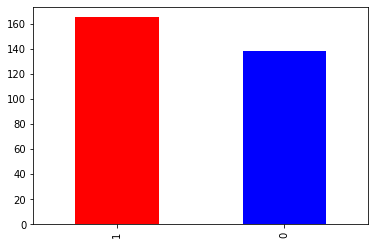

In [6]:
df["target"].value_counts().plot(kind="bar" , color=["red", "blue"]);

Yukarıdaki sonuca baktığımızda **,** Veri Setimizin TARGET Kolonu kabaca dengede gibi görünüyor...

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Are there any 'missing values' ?
# Kayıp Değer var mı ? Diye bakalım ::

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### **Heart Disease Frequency according to Sex (Cinsiyete Göre Kalp Hastalığı Sıklığı)**

In [5]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

Yukarıya baktığımızda **,** Veri Setimizde **'207'** tane Erkek **'96'** tane Kadın var...

In [4]:
#   'Compare' target column with sex column ::
#   Target sütununu , Cinsiyet (Sex) sütunuyla 'karşılaştırın' ::

pd.crosstab(df.target , df.sex)

sex,0,1
target,,
0,24,114
1,72,93


Yukarıya baktığımızda da **, 96** Kadının **72** tanesi Kalp Hastası. **207** Erkeğin de **93** tanesi Kalp Hastası...

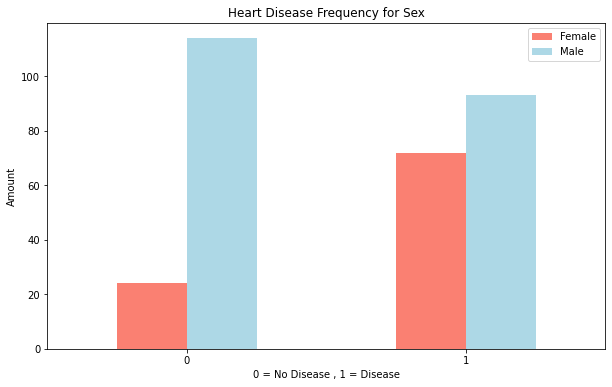

In [13]:
#   Create a plot of 'crosstab' ::

pd.crosstab(df.target , df.sex).plot(kind="bar" ,
                                    figsize=(10, 6) ,
                                    color=["salmon" , "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female" , "Male"]);
plt.xticks(rotation=0);

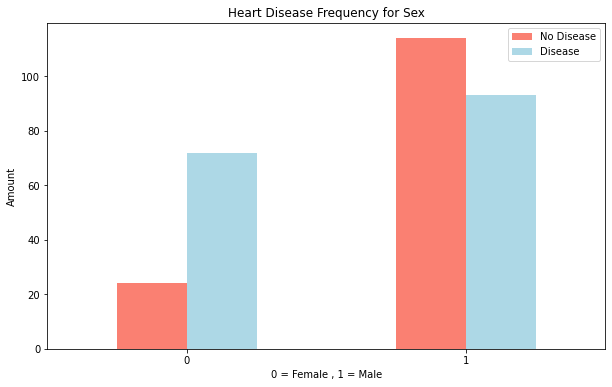

In [14]:
#   Create a plot of 'crosstab' ::

pd.crosstab(df.sex , df.target).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon" , "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = Female , 1 = Male")
plt.ylabel("Amount")
plt.legend(["No Disease" , "Disease"]);
plt.xticks(rotation=0);

Yukarıdaki Grafiklere baktığımızda da gördüğümüz gibi **,** Veri Setindeki Kadınların çoğu Kalp Hastası...

+ **Bu Veri Setine göre bir model FIT etsek , kurduğumuz model bu Veri Setinden muhtemelen ne öğrenir ?**
+ + **"Kadın ise hastadır"** gibi bir **Korelasyon** kurabilir...
+ + Ama tabiki bu **GERÇEK Hatatta bu böyle değildir...** Kadın olmak Kalp Hastalığı riskini arttırmaz...

### **Age vs. Max Heart Rate for Heart Disease (Kalp Hastalığı için 'Yaş' ve 'Maksimum Kalp Atış Hızı')**

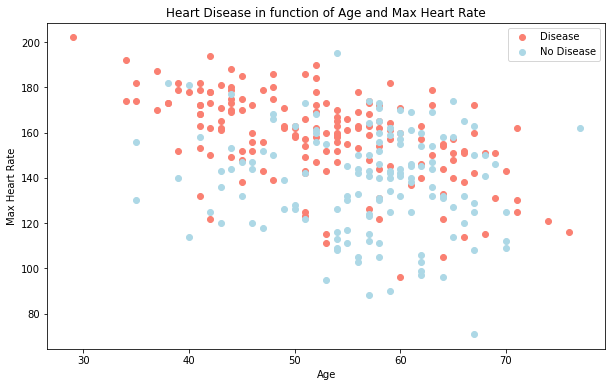

In [8]:
#   Create another figure ::
plt.figure(figsize=(10 , 6))

#   Scatter with postivie examples ::
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

#   Scatter with negative examples ::
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

#   Add some helpful info ::
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease" , "No Disease"]);

Yukarıdaki Grafikte gördüğümüz gibi **,** Yaşlandıkça Kalp Ritim Hızı azalıyor...
<br> Aynı zamanda Kalp Ritim Hızı arttıkça da Kalp Hastası olma ihtimali artıyor...

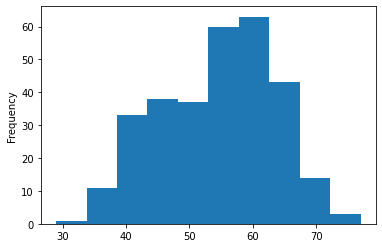

In [9]:
#   Check the distribution of the 'age' column with a histogram ::
#   Bir histogram ile 'yaş (age)' sütununun dağılımını kontrol edin ::

df.age.plot.hist();

**############################################**
<br> **represent =** Temsil etmek , Yansıtmak.
<br> **representative =** Temsili , Temsil eden , Örnek , Mümessil.
<br> **chest pain =** Göğüs ağrısı
<br> **############################################**

**++++ NOTE ++++**
<br> Tahmin tekniğimizin ve Veri Setimizin **;** hangi amaç için kullanmak istiyorsak **,** modeli kullanamacağımız insanlara uygun olması lazım...
<br> Yani aslında **'sample'**'miz **,** **representative** bir **'sample'** olması lazım... Yani amacına uygun bir Veri Seti olması lazım...

### **Heart Disease Frequency per Chest Pain Type (Göğüs Ağrısı Türüne Göre Kalp Hastalığı Sıklığı)**

3. **cp - chest pain type**
    * **0 :** Typical angina **:** chest pain related decrease blood supply to the heart
    * **1 :** Atypical angina **:** chest pain not related to heart
    * **2 :** Non-anginal pain **:** typically esophageal spasms (non heart related)
    * **3 :** Asymptomatic **:** chest pain not showing signs of disease

In [66]:
#   'cp' sütununu , 'Target' sütunuyla 'karşılaştırın' ::

pd.crosstab(df.cp , df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


+ Yukarıdaki bu karşılaştırmayı **,** Grafik şeklinde gösterelim **:**

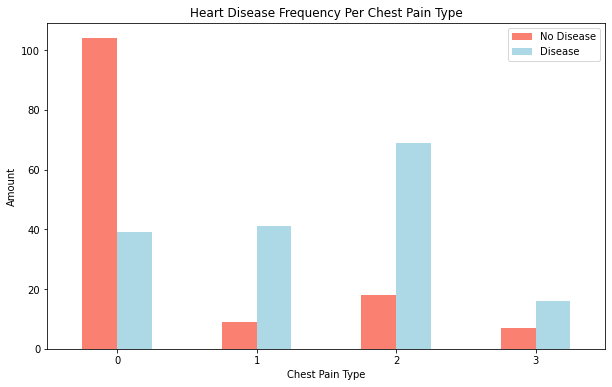

In [11]:
#   Make the crosstab more visual ::

pd.crosstab(df.cp , df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

#   Add some communication ::
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

Yukarıdaki Grafikte de gördüğümüz gibi **, '1' - '2' - '3'** numaralı Göğüs Ağrıları **,** Kalp Hastalığı için bir şeyler ifade ediyor... AMA özellikle **'2'** numaralı Göğüs Ağrısı **,** daha çok şey ifade ediyor... 

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
#   Make a 'Correlation Matrix' ::

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

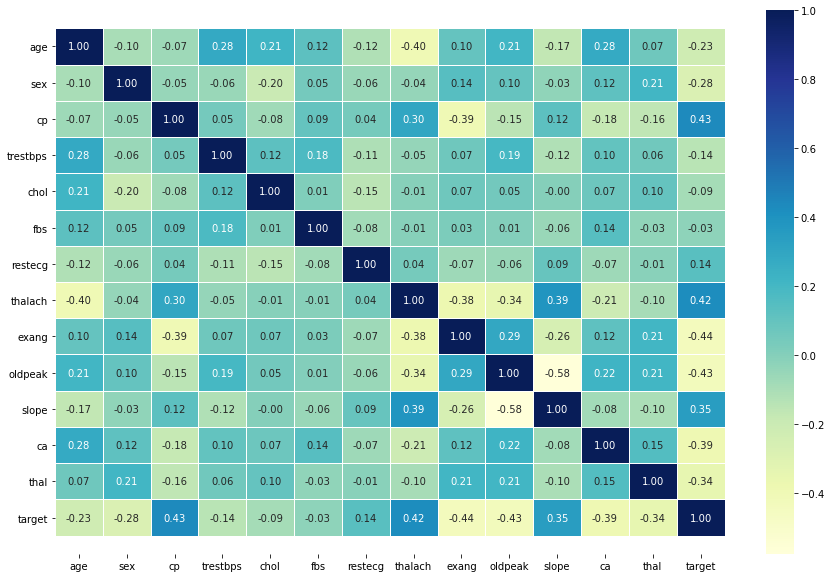

In [14]:
#   Let's make our 'Correlation Matrix' a little prettier ::
#   'Korelasyon Matrisi'mizi biraz daha güzelleştirelim. Yani Grafik halde görselleştirelim ::

corr_matrix = df.corr()
fig , ax = plt.subplots(figsize=(15 , 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom , top = ax.get_ylim()
ax.set_ylim(bottom + 0.5 , top - 0.5)

Featurelerin (Değişkenlerin) birbirleri ile olan Korelasyonlarını yukarıda görüyoruz...
<br> TARGET Kolonu DIŞINDAKİ kolonlarda **,** kendi aralarında yüksek Korelasyon var ise **,** yüksek Korelasyon olan kolonlardan birisini istersek çıkarabiliriz...

## **5. Modelling**

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
#   Split data into 'X' and 'y' ::

X = df.drop("target" , axis=1)

y = df["target"]

In [17]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [18]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [19]:
#   Split into train & test set ::

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=20)

In [26]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
218,65,1,0,135,254,0,0,127,0,2.8,1,1,3
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2


In [28]:
y_train , len(y_train)

(218    0
 124    1
 176    0
 39     1
 8      1
       ..
 161    1
 260    0
 24     1
 279    0
 90     1
 Name: target, Length: 242, dtype: int64,
 242)

**###############################**
<br> **pattern =** Model , Örnek , Desen , Kalıp.
<br> **###############################**

+ Now we've got our data split into TRAINING and TEST sets, it's time to build a machine learning model.
<br> We'll train it (find the patterns) on the training set.
<br> And we'll test it (use the patterns) on the test set.

+ We're going to try **'4'** different machine learning models:
+ **1 - Logistic Regression**
+ **2 - K-Nearest Neighbours Classifier**
+ **3 - Random Forest Classifier**
+ **4 - Boosting Classifier**

+ Artık verilerimizi TRAIN ve TEST setlerine ayırdık, bir makine öğrenimi modeli oluşturma zamanı.
<br> Onu eğitim setinde eğiteceğiz (modelleri bulacağız).
<br> Ve test setinde test edeceğiz (modelleri kullanacağız).
+ **'4'** farklı makine öğrenimi modeli deneyeceğiz **:**
+ **1 - Lojistik Regresyon**
+ **2 - K-En Yakın Komşular Sınıflandırıcısı**
+ **3 - Rastgele Orman Sınıflandırıcısı**
+ **4 - Sınıflandırıcıyı Artırma**

### **Model Comparison (Model Karşılaştırma)**

In [29]:
#   Create a Pipeline ::
pipe = Pipeline([('scaler', StandardScaler()) , ('Classifier', RandomForestClassifier())])

#   Create space of candidate learning algorithms and their hyperparameters ::
#   Aday olan öğrenme algoritmaları ve hiperparametreleri için alan yaratın ::
search_space = [{'Classifier': [LogisticRegression(solver='liblinear')],
                     'Classifier__C': np.logspace(-4, 4, 100),
                 'Classifier__penalty': ['l1', 'l2']},
                {'Classifier': [KNeighborsClassifier()],
                     'Classifier__n_neighbors': np.arange(1, 10)},
                {'Classifier': [RandomForestClassifier(random_state=20)],
                     'Classifier__n_estimators': [300, 400, 500],
                     'Classifier__max_features': np.arange(1, 10)},
                {'Classifier': [GradientBoostingClassifier(random_state=10)],
                     'Classifier__n_estimators': [100, 500, 1000],
                     'Classifier__learning_rate': [0.001, 0.01, 0.1]}]

#   Create grid search ::
clf = GridSearchCV(pipe , search_space , cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=3), 
                verbose=0 , scoring="accuracy")

#   Fit grid search ::
best_model = clf.fit(X_train , y_train)

#   View best model ::
best_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('Classifier',
   LogisticRegression(C=0.14174741629268062, penalty='l1', solver='liblinear'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'Classifier': LogisticRegression(C=0.14174741629268062, penalty='l1', solver='liblinear'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'Classifier__C': 0.14174741629268062,
 'Classifier__class_weight': None,
 'Classifier__dual': False,
 'Classifier__fit_intercept': True,
 'Classifier__intercept_scaling': 1,
 'Classifier__l1_ratio': None,
 'Classifier__max_iter': 100,
 'Classifier__multi_class': 'auto',
 'Classifier__n_jobs': None,
 'Classifier__penalty': 'l1',
 'Classifier__random_state': None,
 'Classifier__solver': 'liblinear',
 'Classifier__tol': 0.0001,
 'Classifier__verbose': 0,
 'Classifier__warm_start': False}

In [30]:
scaler = StandardScaler()
scaler.fit(X_train)
X_trainStandard = scaler.transform(X_train)
X_testStandard = scaler.transform(X_test)

In [67]:
model = LogisticRegression(C=0.1176811952434999 , penalty='l1' , solver='liblinear')

model.fit(X_trainStandard , y_train)

y_preds = model.predict(X_testStandard)

print('Accuracy : ' , accuracy_score(y_test , y_preds))

Accuracy :  0.8688524590163934


## Evaluating our tuned Machine Learning Classifier, beyond **'accuracy' :**

* **ROC curve and AUC score**
* **Confusion matrix**
* **Classification report**
* **Precision**
* **Recall**
* **F1-score**

... and it would be great if **Cross-Validation** was used where possible...

To make comparisons and evaluate our trained model, first we need to make **predictions :**

## Ayarlanmış Makine Öğrenimi Sınıflandırıcımızı **'accuracy'** dışındaki metrikler ile de değerlendirelim **:**

* **ROC eğrisi ve AUC puanı**
* **Karışıklık matrisi**
* **Sınıflandırma raporu**
* **Kesinlik**
* **Hatırlamak**
* **F1-skoru**

... ve mümkün olan yerlerde **Cross-Validation (Çapraz Doğrulama)** kullanılması harika olurdu...

Karşılaştırma yapmak ve eğitilmiş modelimizi değerlendirmek için önce **Tahminlerde** bulunmamız gerekiyor **:**

In [33]:
y_preds

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [34]:
np.array(y_test)

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

C:\anaconda3\envs\ITUmindset\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


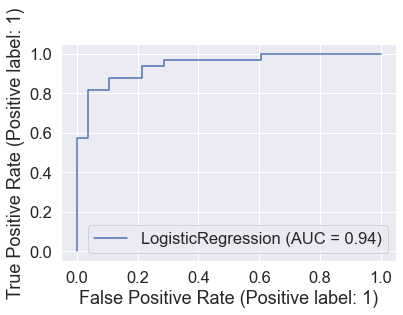

In [47]:
#   Plot ROC curve and calculate and calculate AUC metric ::
#   ROC eğrisini çizin ve AUC metriğini hesaplayın ::

plot_roc_curve(model , X_testStandard , y_test)

Yukarıdaki **'AUC = 0.94'** sonucu ile **,** çok iyi bir model kurduğumuzu görebiliyoruz...

In [48]:
#   Confusion matrix ::

print(confusion_matrix(y_test , y_preds))

[[22  6]
 [ 2 31]]


+ Şimdi de **, Confusion Matrix**'i **headmap( )** Grafiği şeklinde gösterelim **:**

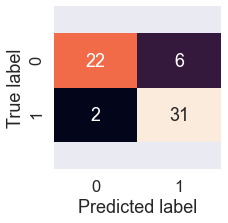

In [49]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test , y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap() :
    Seaborn'un heatmap() fonksiyonunu kullanarak güzel görünen bir 'Confusion Matrix' çizelim :
    """
    fig , ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
    bottom , top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5 , top - 0.5)
    
plot_conf_mat(y_test , y_preds)

Yukarıdaki **Confusion Matrix**'e baktığımızda gayet iyi tahminler görüyoruz...

+ Now we've got a **ROC curve ,** an **AUC metric** and a **confusion matrix.** Let's get a **Classification Report** as well as **cross-validated precision , recall and f1-score :**
+  Şimdi elimizde bir **'ROC eğrisi' ,** bir **'AUC metriği'** ve bir **'Confusion Matrix'** var. Hadi bir **Sınıflandırma Raporunun (Classification Report)** yanı sıra **'çapraz doğrulanmış kesinlik' , 'geri çağırma'** ve **'f1-skoru'** alalım.

In [50]:
print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        28
           1       0.84      0.94      0.89        33

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



Yukarıdaki Rapora baktığımızda da gayet iyi sonuçlar görüyoruz...

### **Feature Importance (Özellik Önemi)**

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for **"(MODEL NAME) feature importance".**

Let's find the **feature importance** for our **LogisticRegression** model...

Feature Importance (Özelliğin önemi) **,** "modelin sonuçlarına en çok hangi özelliklerin (Featurenin) katkıda bulunduğunu ve nasıl katkıda bulunduğunu" sormaktır.

Özellik bulmanın önemi, her makine öğrenimi modeli için farklıdır... Özelliğin önemini bulmanın bir yolu **"(MODEL NAME) feature importance"**'yi aramaktır.

**LogisticRegression** modelimiz için **Feature Importance**'yi bulalım...

In [42]:
#   Check coef_ ::
#   'Logistic Regression' modelimizin Katsayılarını kontrol edelim ::

model.coef_

array([[-0.04632086, -0.35878673,  0.48575605, -0.04556382,  0.        ,
         0.        ,  0.04714564,  0.43751746, -0.21569778, -0.41969766,
         0.06878873, -0.48973171, -0.30805009]])

In [62]:
list(model.coef_[0])

[-0.046332669376023754,
 -0.35878925404734135,
 0.48576258455893373,
 -0.04556005801537057,
 0.0,
 0.0,
 0.04714271998901409,
 0.4374856934518706,
 -0.21571211265192528,
 -0.41967056217203974,
 0.0688755180340664,
 -0.48975098276075746,
 -0.30805194161272303]

**++++ NOTE ++++**
<br> Bu değerler **,** Feature Importance DEĞİLLERDİR... Bu değerler , doğrudan **Featurelerin Katsayılarının kendileridirler...**
<br> **Feature Impırtance**'leri **; 'Decision Trees' , 'Random Forests' , 'Bagging'** veya **'Boosting'** tekniklerinde üretiyoruz... **Feature Importance ,** bir Featureyi **'split'** yaptığımız zaman **,** metriklerin ne kadar **'improvement' (gelişim)** gösterdiğini bize söyler...

In [65]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [44]:
#   Match 'coef''s of Features to Columns ::
#   Katsayıların Featurelerini , Sütunlarla eşleştirin ::

feature_dict = dict(zip(df.columns , list(model.coef_[0])))
feature_dict

{'age': -0.04632085618576852,
 'sex': -0.35878673209558276,
 'cp': 0.48575604949689943,
 'trestbps': -0.045563815817386,
 'chol': 0.0,
 'fbs': 0.0,
 'restecg': 0.04714564480215707,
 'thalach': 0.43751746360299726,
 'exang': -0.21569778166744985,
 'oldpeak': -0.41969765986743734,
 'slope': 0.06878872973271827,
 'ca': -0.48973170791778414,
 'thal': -0.3080500924262177}

In [53]:
#   Şimdi de bu birleştirilmiş haldeki Katsayıları , DataFrame hale getirelim ::

feature_df = pd.DataFrame(feature_dict , index=[0])
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.046321,-0.358787,0.485756,-0.045564,0.0,0.0,0.047146,0.437517,-0.215698,-0.419698,0.068789,-0.489732,-0.30805


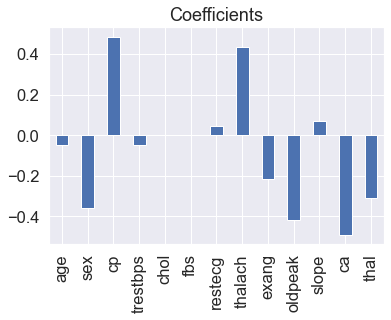

In [54]:
#   Visualize coefficients ::
#   Katsayıları görselleştirelim ::

feature_df.T.plot.bar(title="Coefficients" , legend=False);

+ **Yukarıdaki grafikte mesela , 'Cinsiyet (Sex)' kolonunu yorumlayalım... :**
+ + Sex **'0'**'dan **'1'**'e çıktığı zaman **;** yani **Kadından Erkeğe** döndüğü zaman **,** Kalp Hastası olma ihtimalinin azaldığını söylüyor... Tam tersten okursak da **, Erkekten Kadına** döndüğü zaman da **,** Kalp Hastası olma ihtimalinin arttığını söylüyor...

## **DİKKAT !**
**AMA !** GERÇEK Hayatta böyle bir şey söz konusu bile değil... Yani Kadın olmak **,** Kalp Hastası olma ihtimalini asla arttırmaz... Biz bunu GERÇEK Hayattan biliyoruz... YANİ aslında biz YANLIŞ bir model kurduk... **Tüm metrikler , Confusion Matrix , vb.** hepsi çok iyi bir model kurduğumuzu söyledi... AMA bu ASLA Gerçek değil...
<br> Machine Learning kurallarının hiçbirinde bir hata yapmadık... AMA yine de YANLIŞ bir model kurduk... Direkt  Veri Setimizin KENDİSİ bizim böyle YANLIŞ bir model kurmamıza sebep oldu... BU DURUMA HER ZAMAN ÇOK DİKKAT ETMELİYİZ **!** Veri Setini HER ZAMAN İYİ ANLAMALIYIZ **!**
<br> Daha KOMPLEKS modeller kurmaya başladığımız anda **,** kendimizi bu şekilde kandırma ihtimalimiz de artıyor **..!**
<br> HER ZAMAN dikkatli olmamız gerekiyor...

### **Mesela burada bu sorunu çözmek için ne yapabilirdik... :**
+ Cinsiyetleri ayırarak iki farklı Veri Seti oluşturup **,** Kadınlar ve Erkekler için ayrı ayrı Veri Setleri ile ayrı ayrı modeller kurabiliriz...
+ Gerçekten ilgileneceğimiz Veri Seti içerisindeki Kadın rasyosuna (oranına) bakarız ve Kadınların hasta olanlarının bir kısmını Veri Setinden çıkarabiliriz...
+ Hasta olmayan Kadınları Veri Setinde yapay olarak Rastgele çoğaltabiliriz...
+ **...** gibi gibi... Bu tip şeyler deneyebiliriz...
+ AMA EN İDEALİ **,** DAHA DÜZGÜN bir Veri Seti bulmaktır...

**#################**
<br> **ratio =** Oran , Rasyo.
<br> **#################**

In [64]:
pd.crosstab(df["sex"] , df["target"])

target,0,1
sex,,
0,24,72
1,114,93


**++++ NOTE ++++**
<br> **Bütün Teknikler (Yöntemler) şunu kabul eder :**
<br> Bana gelmiş olan Veri Seti **; "** GERÇEKTE olanı represent edebilen (temsil edebilen) ve doğru bir örnektir **"** olarak kabul eder... Ama bizim Veri Setimiz bunu karşılamıyorsa veya amacımıza uygun değilse o zaman modelimiz büyük oranda yanılır ve bizi de yanıltır...

**++++ NOTE ++++**
<br> AYNI ZAMANDA **,** kurduğumuz modelin direkt kendisi **;** GERÇEK Hayatta insanları manipüle edip **,** modelimizin başarımını yine bozabilir...
<br> YANİ mesela modelimiz önümüzdeki hafta için doların artacağını tahmin ediyorsa ve bu tahmini insanlara duyurursak **;** bu tahmin ile piyasayı manipüle edip modelimizin başarısını etkileyebiliriz...
<br> Bu da bir parametredir ve ciddiye alınmalıdır...